# # Heart Failure Prediction

The aim here is to predict if a patient got a hearth diases or if he is in good health.
For this, I'm using a dataset I've founded for free on kaggle, named "Heart Failure Prediction Dataset". 

# As a context:

Cardiovascular diseases are the leading cause of death globally, claiming approximately 17.9 million lives annually and representing 31% of all deaths worldwide. Heart attacks and strokes account for 80% of CVD-related deaths, with one-third occurring prematurely in individuals under 70 years old. Heart failure, a common consequence of CVDs, can be predicted using the 11 features contained in this dataset.
Early detection and management are crucial for individuals with cardiovascular disease or those at high risk (due to factors like hypertension, diabetes, hyperlipidemia, or existing conditions). Machine learning models can provide valuable assistance in this early detection process.

# Steps of the project:

 1. Data Loading & Initial Exploration
   
 2. Data Preprocessing

 3. Exploratory Data Analysis (EDA)

 4. Model Training

 5. Model Evaluation & Comparison




# 1. Data Loading & Initial Exploration


In [20]:

#basic libraries and loading data

import numpy as np 
import pandas as pd 

heart_data = pd.read_csv("heart.csv")
heart_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
heart_data.info()

In [ ]:
heart_data.describe()

# 2. Data Processing

In [ ]:
# looking for missing values
heart_data.isnull().sum()

# delete them
heart_data = heart_data.dropna()

In [19]:
#defining target and features

target = 'HeartDisease'
X = heart_data.drop('HeartDisease',axis = 1)
y = heart_data['HeartDisease']

# one-hot encoding
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


# nothing much to do here as the dataset is already clean

 # 3. Exploratory Data Analysis (EDA)

C:\Users\sulta\AppData\Local\Temp\ipykernel_6716\3140900554.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart_data, x='HeartDisease', palette=['lightcoral', 'lightblue'])


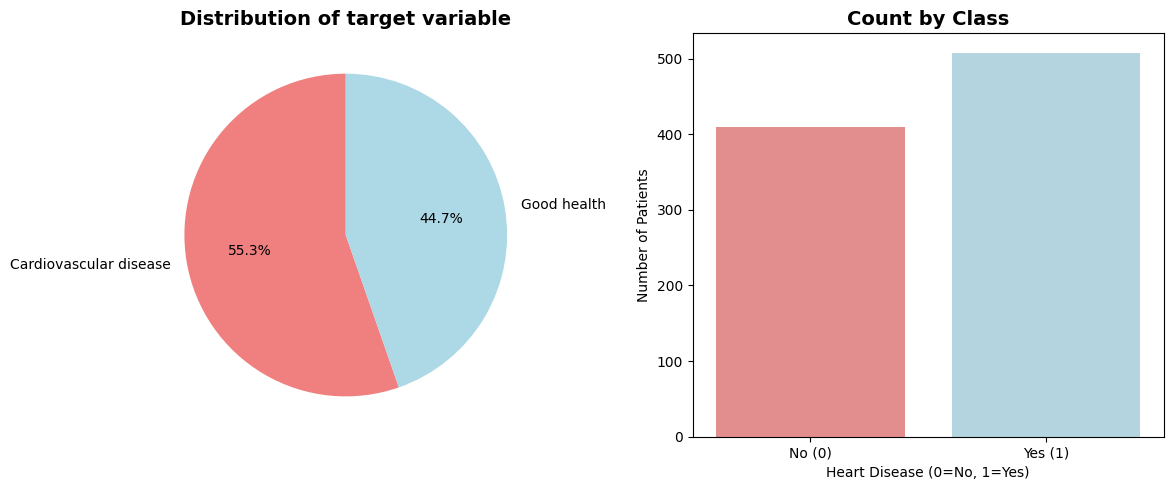

In [21]:
# importing librairies for EDA

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default')
sns.set_palette("husl")

#targer variable distribution 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
target_counts = heart_data['HeartDisease'].value_counts()
colors = ['lightcoral', 'lightblue']
plt.pie(target_counts.values, labels=['Cardiovascular disease', 'Good health'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of target variable', fontsize=14, fontweight='bold')

plt.subplot(1, 2, 2)
sns.countplot(data=heart_data, x='HeartDisease', palette=['lightcoral', 'lightblue'])
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Number of Patients')
plt.title('Count by Class', fontsize=14, fontweight='bold')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])

plt.tight_layout()
plt.show()


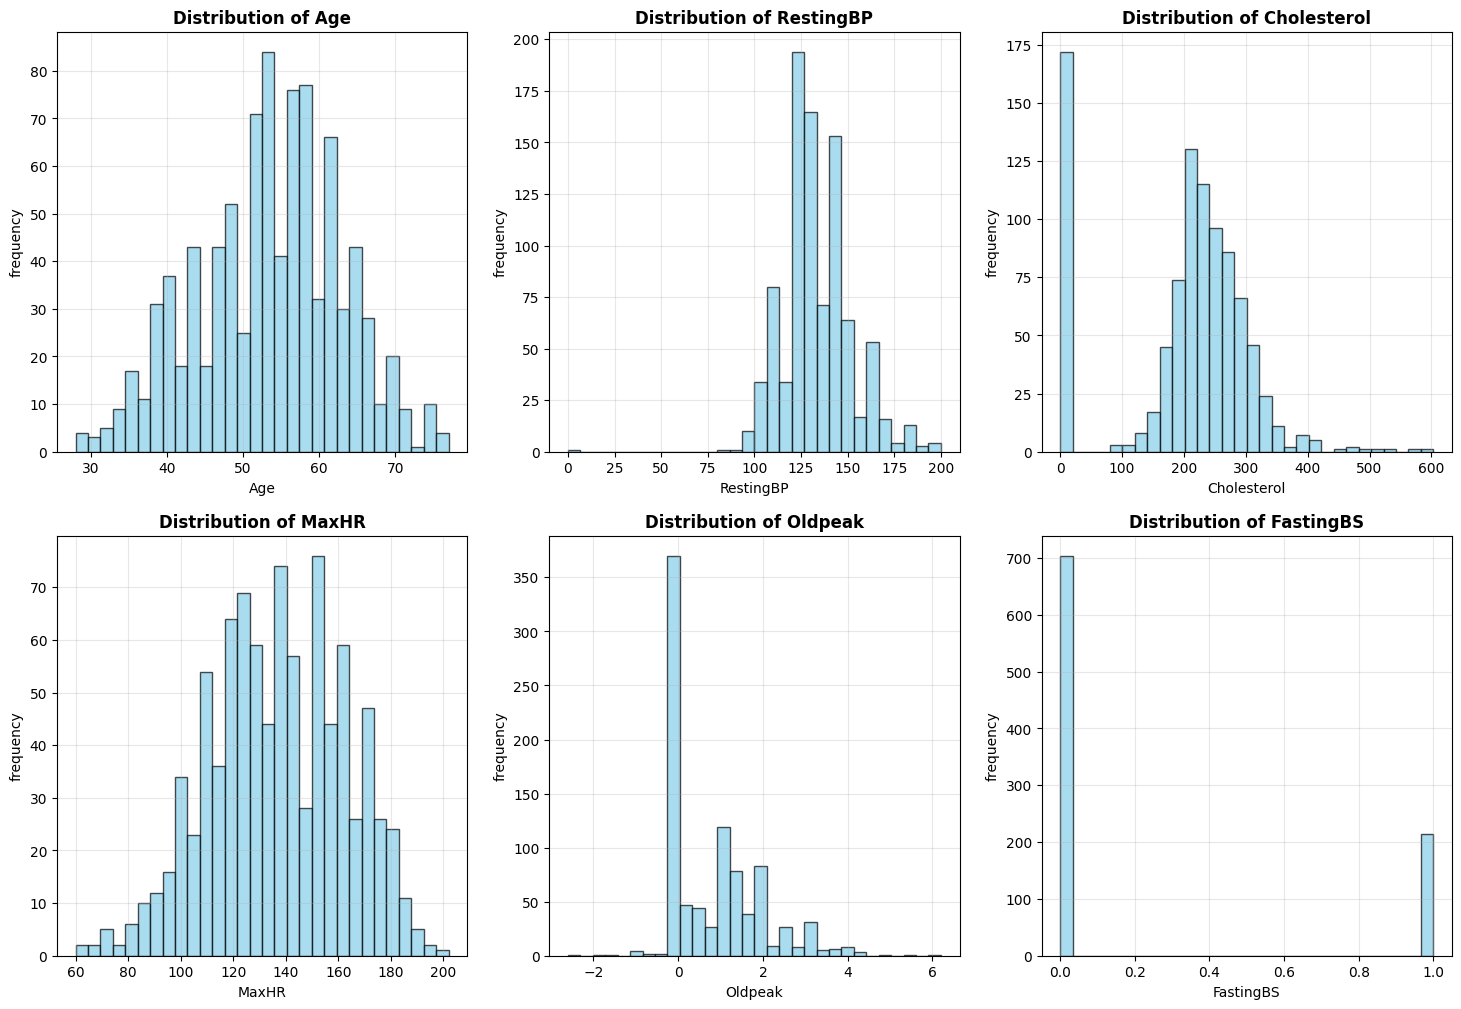

In [22]:

# numericale variables
numeric_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']

#  frequency histograms on numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_columns):
    axes[idx].hist(heart_data[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('frequency')
    axes[idx].grid(True, alpha=0.3)

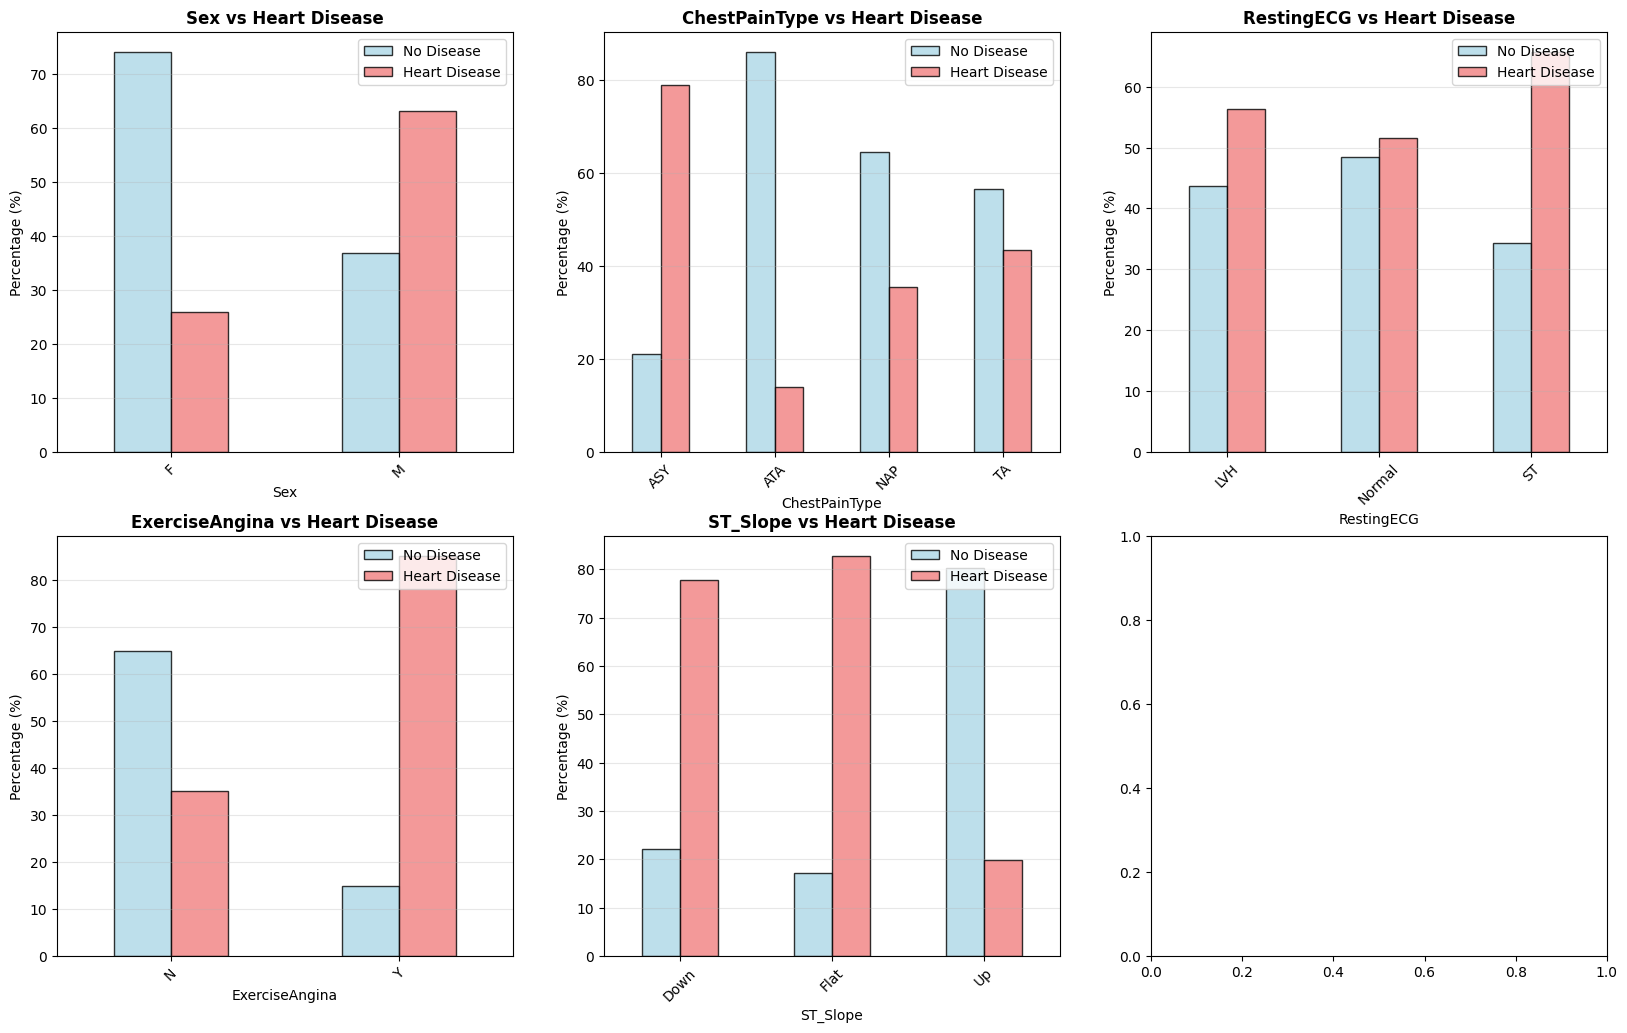

In [23]:
# identify categorical variables
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Analysis of categorical variables in relation to target (percentage)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, col in enumerate(categorical_columns):
    # Stacked bar plot
    crosstab = pd.crosstab(heart_data[col], heart_data['HeartDisease'], normalize='index') * 100
    
    crosstab.plot(kind='bar', ax=axes[idx], color=['lightblue', 'lightcoral'], 
                  alpha=0.8, edgecolor='black')
    axes[idx].set_title(f'{col} vs Heart Disease', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(['No Disease', 'Heart Disease'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(True, alpha=0.3, axis='y')

# Remove empty subplot

# 4. Model training


In [ ]:
# Scaling x using a standard scaler, we could have used a minmax one 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#splitting dataset (80/20)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state = 42)

#importing sklearn models and metrics

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# importing and training models

# random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

#logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

print("models trained!")

# 5. Model Evaluation & Comparison



In [24]:
# evaluate all models on test data

models = {
    'Random Forest': rf_model,
    'SVM': svm_model, 
    'Logistic Regression': lr_model,
    'Gradient Boosting': gb_model
}

results = {}

for name, model in models.items():
    # predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Métriques
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC: {auc:.4f}")



Random Forest:
Accuracy: 0.8750
AUC: 0.9365

SVM:
Accuracy: 0.8750
AUC: 0.9417

Logistic Regression:
Accuracy: 0.8533
AUC: 0.9268

Gradient Boosting:
Accuracy: 0.8641
AUC: 0.9284


In [25]:
# detailed classification reports for the model who perform the best

# find the most performant model
best_model_name = max(results.items(), key=lambda x: x[1]['auc'])[0]

print(f"Best Model is {best_model_name} !")


y_pred = results[best_model_name]['predictions']

# classification report
print(f"\ncalssification report:")
print(classification_report(y_test, y_pred))


Best Model is SVM !

calssification report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



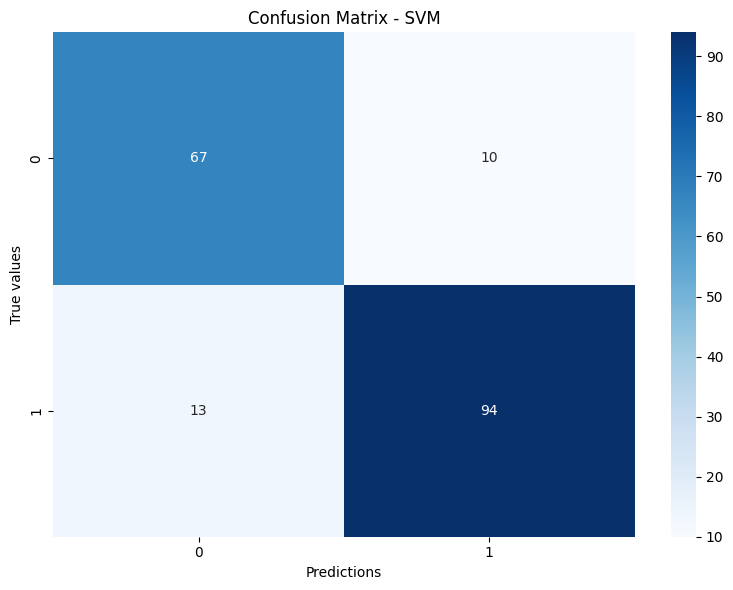

In [26]:
# Confusion matrix for SVM (best model)

plt.figure(figsize=(8, 6))

y_pred = results['SVM']['predictions']
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predictions")
plt.ylabel("True values")
plt.title("Confusion Matrix - SVM")

plt.tight_layout()
plt.show()

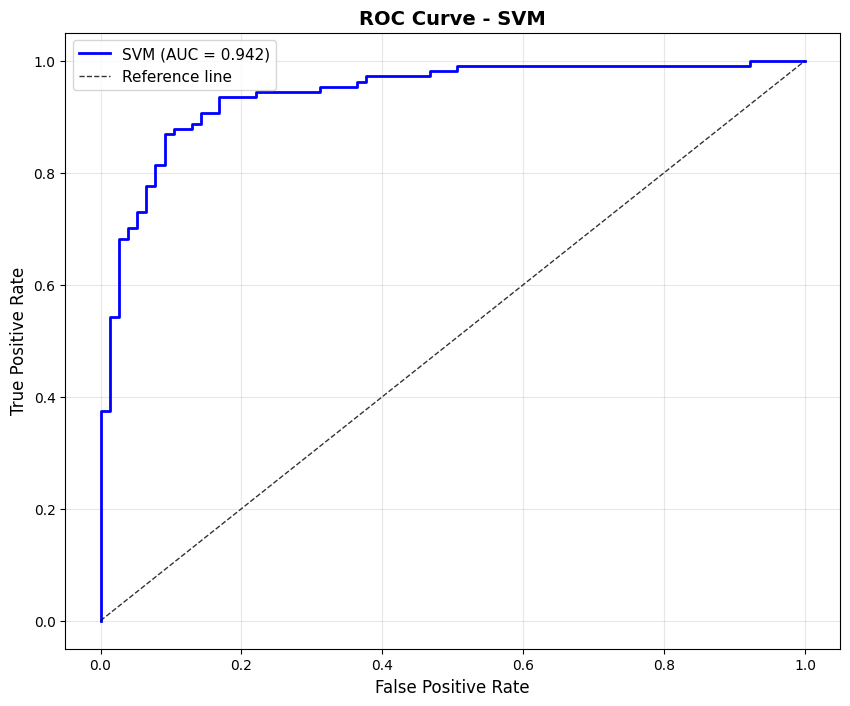


AUC Score for SVM:
SVM: AUC = 0.9417


In [27]:
#ROC Curve for SVM

plt.figure(figsize=(10, 8))

y_pred_proba = results['SVM']['probabilities']
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = results['SVM']['auc']

plt.plot(fpr, tpr, color='blue', linewidth=2,
         label=f'SVM (AUC = {auc:.3f})')

plt.plot([0,1], [0,1], 'k--', linewidth=1, alpha=0.8, label='Reference line')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve - SVM", fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# Display AUC score for SVM
print("\nAUC Score for SVM:")
print(f"SVM: AUC = {results['SVM']['auc']:.4f}")

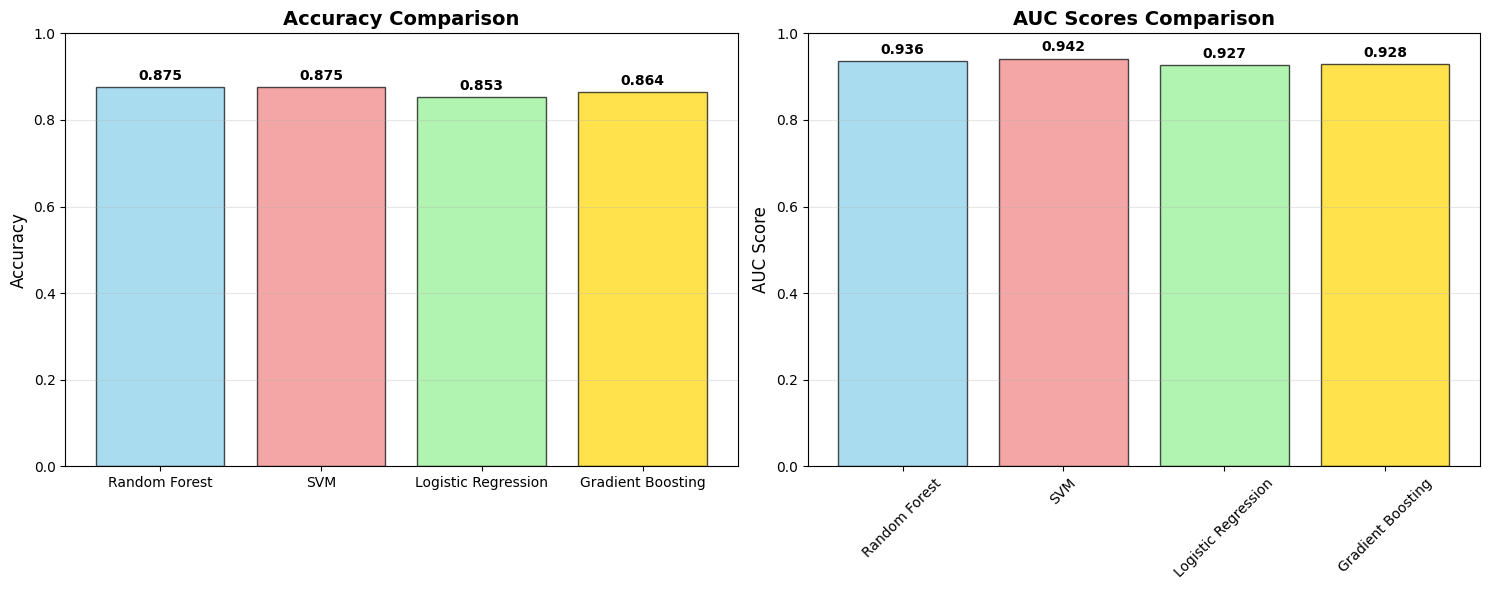


BEST MODEL BY AUC: SVM (AUC: 0.9417)
BEST MODEL BY ACCURACY: Random Forest (Accuracy: 0.8750)


In [28]:
# Visual comparison of performances

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plots for accuracy
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
aucs = [results[name]['auc'] for name in model_names]

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

# Accuracy
bars1 = ax1.bar(model_names, accuracies, color=colors, alpha=0.7, edgecolor='black')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, acc in zip(bars1, accuracies):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# AUC
bars2 = ax2.bar(model_names, aucs, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('AUC Score', fontsize=12)
ax2.set_title('AUC Scores Comparison', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.grid(True, alpha=0.3, axis='y')

# Add values on bars
for bar, auc in zip(bars2, aucs):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{auc:.3f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Find the best model
best_model_auc = max(results.items(), key=lambda x: x[1]['auc'])
best_model_acc = max(results.items(), key=lambda x: x[1]['accuracy'])

print(f"\nBEST MODEL BY AUC: {best_model_auc[0]} (AUC: {best_model_auc[1]['auc']:.4f})")
print(f"BEST MODEL BY ACCURACY: {best_model_acc[0]} (Accuracy: {best_model_acc[1]['accuracy']:.4f})")
